In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [146]:
df = pd.read_csv('csgo.csv')
df

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,15.41,11.0,14.0,de_train,True,200.0,242.0,195.0,359.0,100.0,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,T
122406,174.93,11.0,15.0,de_train,False,500.0,500.0,95.0,175.0,11500.0,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,T
122407,114.93,11.0,15.0,de_train,False,500.0,500.0,495.0,475.0,1200.0,...,4.0,3.0,5.0,1.0,0.0,0.0,5.0,0.0,0.0,T
122408,94.93,11.0,15.0,de_train,False,500.0,500.0,495.0,475.0,1200.0,...,5.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,T


In [147]:
df.isnull().sum().sum()

np.int64(0)

In [148]:
df.duplicated().sum()

np.int64(4962)

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 97 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   time_left                     122410 non-null  float64
 1   ct_score                      122410 non-null  float64
 2   t_score                       122410 non-null  float64
 3   map                           122410 non-null  object 
 4   bomb_planted                  122410 non-null  bool   
 5   ct_health                     122410 non-null  float64
 6   t_health                      122410 non-null  float64
 7   ct_armor                      122410 non-null  float64
 8   t_armor                       122410 non-null  float64
 9   ct_money                      122410 non-null  float64
 10  t_money                       122410 non-null  float64
 11  ct_helmets                    122410 non-null  float64
 12  t_helmets                     122410 non-nul

In [150]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['round_winner'] = le.fit_transform(df['round_winner'])
df['map'] = le.fit_transform(df['map'])
df['bomb_planted'] = le.fit_transform(df['bomb_planted'])

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 97 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   time_left                     122410 non-null  float64
 1   ct_score                      122410 non-null  float64
 2   t_score                       122410 non-null  float64
 3   map                           122410 non-null  int64  
 4   bomb_planted                  122410 non-null  int64  
 5   ct_health                     122410 non-null  float64
 6   t_health                      122410 non-null  float64
 7   ct_armor                      122410 non-null  float64
 8   t_armor                       122410 non-null  float64
 9   ct_money                      122410 non-null  float64
 10  t_money                       122410 non-null  float64
 11  ct_helmets                    122410 non-null  float64
 12  t_helmets                     122410 non-nul

In [152]:
# model building

x = df.iloc[:,:-1] #independent
y = df['round_winner'] #target

In [153]:
x

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade
0,175.00,0.0,0.0,1,0,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,156.03,0.0,0.0,1,0,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2,96.03,0.0,0.0,1,0,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
3,76.03,0.0,0.0,1,0,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,174.97,1.0,0.0,1,0,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,15.41,11.0,14.0,6,1,200.0,242.0,195.0,359.0,100.0,...,1.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
122406,174.93,11.0,15.0,6,0,500.0,500.0,95.0,175.0,11500.0,...,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
122407,114.93,11.0,15.0,6,0,500.0,500.0,495.0,475.0,1200.0,...,4.0,4.0,3.0,5.0,1.0,0.0,0.0,5.0,0.0,0.0
122408,94.93,11.0,15.0,6,0,500.0,500.0,495.0,475.0,1200.0,...,1.0,5.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0


In [154]:
y

0         0
1         0
2         0
3         0
4         0
         ..
122405    1
122406    1
122407    1
122408    1
122409    1
Name: round_winner, Length: 122410, dtype: int64

In [155]:
# trian test split

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 34)

In [156]:
# scale your data
# apply standard scaler

from sklearn.preprocessing import StandardScaler

In [157]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [158]:
df

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,1,0,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,156.03,0.0,0.0,1,0,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,96.03,0.0,0.0,1,0,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,76.03,0.0,0.0,1,0,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,174.97,1.0,0.0,1,0,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,15.41,11.0,14.0,6,1,200.0,242.0,195.0,359.0,100.0,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
122406,174.93,11.0,15.0,6,0,500.0,500.0,95.0,175.0,11500.0,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
122407,114.93,11.0,15.0,6,0,500.0,500.0,495.0,475.0,1200.0,...,4.0,3.0,5.0,1.0,0.0,0.0,5.0,0.0,0.0,1
122408,94.93,11.0,15.0,6,0,500.0,500.0,495.0,475.0,1200.0,...,5.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,1


In [159]:
x_train

array([[-0.05558434, -0.14888546,  1.08076314, ...,  0.98467312,
        -0.16299881, -0.15738153],
       [-0.42300753, -1.39956932, -0.78429683, ...,  2.18446246,
        -0.16299881, -0.15738153],
       [ 0.31202266, -0.9826747 , -0.36983906, ...,  2.18446246,
        -0.16299881, -0.15738153],
       ...,
       [-0.2110821 , -1.39956932, -1.40598349, ..., -0.81501089,
        -0.16299881, -0.15738153],
       [ 1.3117299 ,  0.05956185, -0.78429683, ..., -0.81501089,
        -0.16299881, -0.15738153],
       [-0.5156445 ,  0.05956185,  1.49522091, ...,  0.98467312,
        -0.16299881, -0.15738153]], shape=(97928, 96))

In [160]:
# min(no. of features, no. of classes - 1) --> min(97, (2-1)) --> 1

In [161]:
# lda -- main goal -- maximize the class seperate
# 97 columns --> might not every column contributing to seperate class
# select the colummns which are contributing much to seperate the class

In [162]:
# LDA Implementation

In [163]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [164]:
lda = LinearDiscriminantAnalysis()

In [165]:
# x_train_lda = lda.fit_transform(x_train, y_train)
# x_test = lda.transform(x_test)

In [166]:
lda.fit(x_train, y_train)

,solver,'svd'
,shrinkage,None
,priors,None
,n_components,None
,store_covariance,False
,tol,0.0001
,covariance_estimator,None


In [167]:
lda.transform(x_test)

array([[ 1.95958498],
       [ 0.94535547],
       [-0.49000919],
       ...,
       [-0.04953078],
       [-1.41958857],
       [ 0.31140564]], shape=(24482, 1))

In [168]:
lda.coef_

array([[ 1.39116006e-01, -2.26772992e-02,  1.45051550e-02,
        -7.74159720e-02,  2.36978136e-01, -4.24177705e-01,
         3.10303482e-01, -5.59302375e-01,  5.46199281e-01,
        -1.97760965e-01,  1.49373767e-01,  5.67691517e-03,
         1.25586965e-01, -2.10887625e-02, -2.30143819e-01,
         2.72550392e-01, -1.92114001e-01,  6.09687322e-01,
        -2.05520096e-01,  3.54341305e-02, -3.10565627e-01,
         2.53331242e-01, -9.65475878e-17, -1.43599248e-03,
         1.41301477e-02,  3.50444347e-02, -5.97117698e-03,
         1.45671229e-02, -1.41185672e-01,  4.40839532e-02,
         2.26135196e-16,  2.24694284e-02, -5.10621117e-02,
         1.36699332e-01,  2.09709790e-02, -1.77451427e-02,
         1.08346031e-02,  3.12830535e-16, -9.78052033e-02,
         4.64297635e-02, -4.69709623e-01,  9.33827245e-02,
        -1.52871489e-02,  1.08959615e-01, -1.35783647e-02,
         8.12796473e-03, -1.33763315e-02,  3.39366635e-02,
         1.13262234e-02, -4.49130090e-03, -1.08476208e-0

In [169]:
lda_coefficients = np.exp(np.abs(lda.coef_))

In [170]:
lda_coefficients

array([[1.14925741, 1.02293638, 1.01461087, 1.08049144, 1.26741341,
        1.52833316, 1.36383895, 1.74945161, 1.72667791, 1.21867105,
        1.16110689, 1.00569306, 1.13381377, 1.0213127 , 1.25878103,
        1.31330964, 1.21180866, 1.83985603, 1.22816366, 1.0360694 ,
        1.36419652, 1.28830995, 1.        , 1.00143702, 1.01423045,
        1.03566573, 1.00598904, 1.01467374, 1.15163846, 1.04507009,
        1.        , 1.02272377, 1.05238826, 1.14648339, 1.02119242,
        1.01790352, 1.01089351, 1.        , 1.10274795, 1.0475245 ,
        1.59952966, 1.09788184, 1.0154046 , 1.11511732, 1.01367097,
        1.00816109, 1.01346619, 1.03451908, 1.01139061, 1.0045014 ,
        1.11457839, 1.03386431, 1.        , 1.00758405, 1.01623138,
        1.01057635, 1.02498854, 1.0240865 , 1.        , 1.00756806,
        1.        , 1.01006555, 1.00140947, 1.01205753, 1.24176441,
        1.73649192, 1.08240048, 1.02346692, 1.05238274, 1.08787923,
        1.01367984, 1.00121982, 1.03744127, 1.06

In [171]:
lda_coefficients.shape

(1, 96)

In [172]:
feature_names = x.columns
feature_names

Index(['time_left', 'ct_score', 't_score', 'map', 'bomb_planted', 'ct_health',
       't_health', 'ct_armor', 't_armor', 'ct_money', 't_money', 'ct_helmets',
       't_helmets', 'ct_defuse_kits', 'ct_players_alive', 't_players_alive',
       'ct_weapon_ak47', 't_weapon_ak47', 'ct_weapon_aug', 't_weapon_aug',
       'ct_weapon_awp', 't_weapon_awp', 'ct_weapon_bizon', 't_weapon_bizon',
       'ct_weapon_cz75auto', 't_weapon_cz75auto', 'ct_weapon_elite',
       't_weapon_elite', 'ct_weapon_famas', 't_weapon_famas',
       'ct_weapon_g3sg1', 't_weapon_g3sg1', 'ct_weapon_galilar',
       't_weapon_galilar', 'ct_weapon_glock', 't_weapon_glock',
       'ct_weapon_m249', 't_weapon_m249', 'ct_weapon_m4a1s', 't_weapon_m4a1s',
       'ct_weapon_m4a4', 't_weapon_m4a4', 'ct_weapon_mac10', 't_weapon_mac10',
       'ct_weapon_mag7', 't_weapon_mag7', 'ct_weapon_mp5sd', 't_weapon_mp5sd',
       'ct_weapon_mp7', 't_weapon_mp7', 'ct_weapon_mp9', 't_weapon_mp9',
       'ct_weapon_negev', 't_weapon_negev',

In [173]:
lda_coefficients = lda_coefficients.ravel()

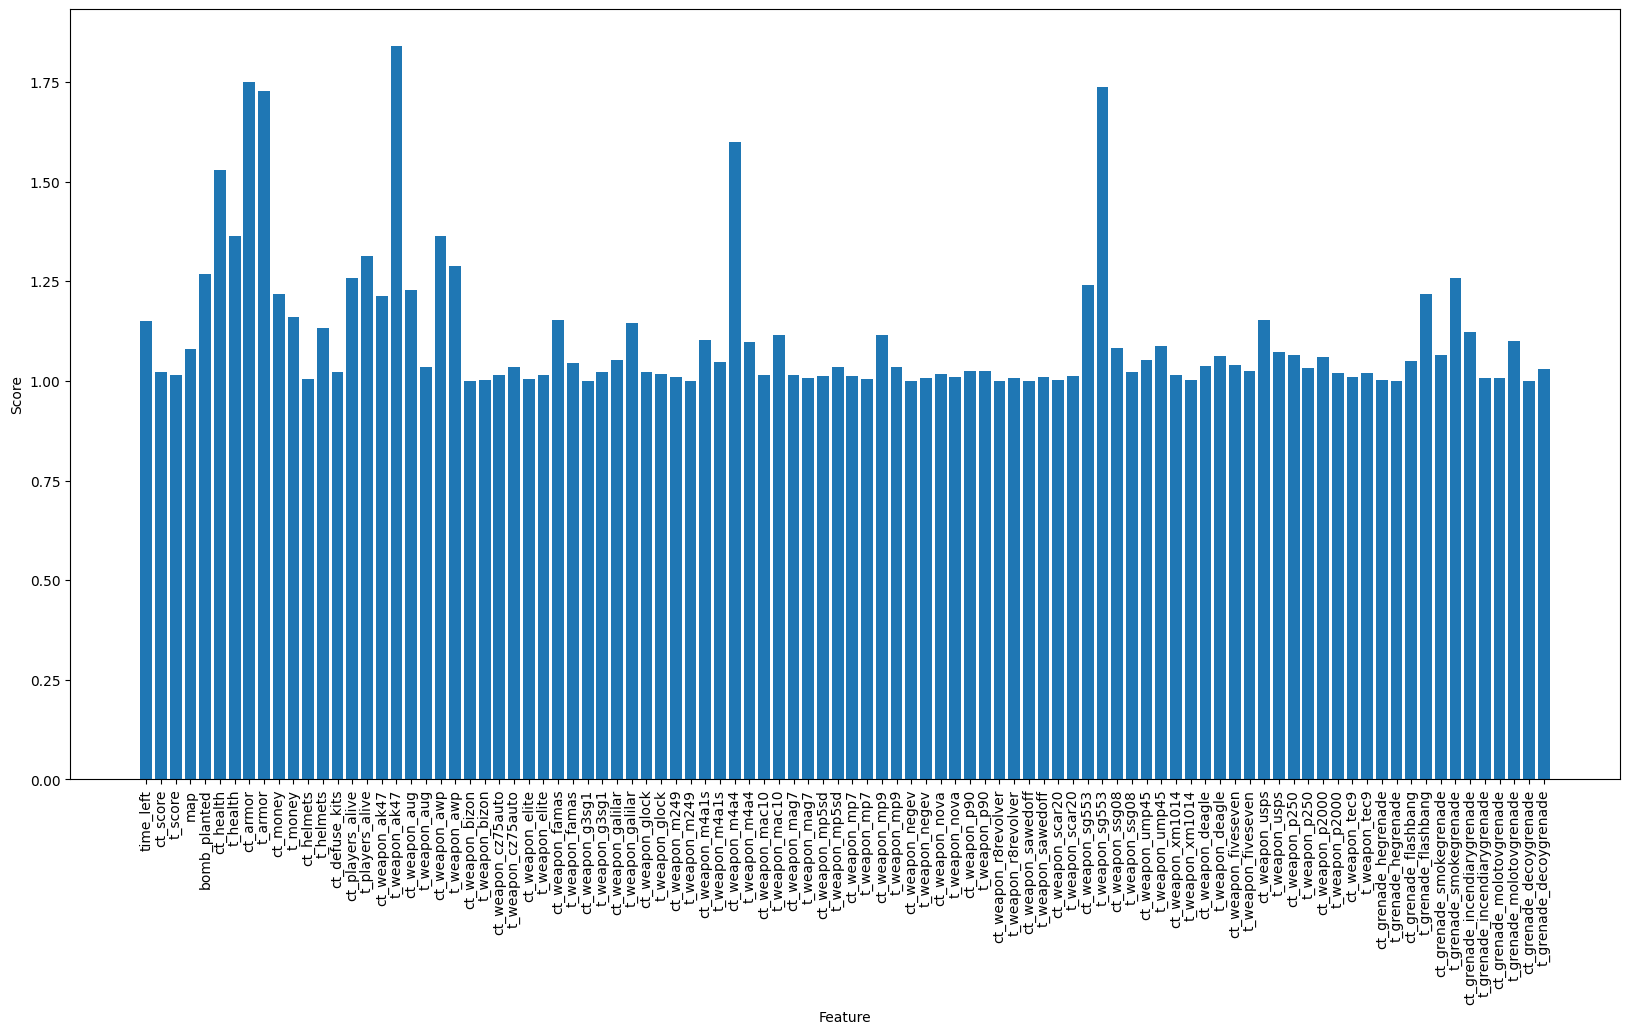

In [174]:
plt.figure(figsize = (20,10))
plt.bar(feature_names, lda_coefficients)
plt.xticks(rotation = 90)
plt.xlabel("Feature")
plt.ylabel("Score")
plt.show()

In [175]:
df_feature_score = pd.DataFrame({'Feature_names': feature_names, 'feature_scores': lda_coefficients})

In [176]:
df_feature_score

,Feature_names,feature_scores
0,time_left,1.149257
1,ct_score,1.022936
2,t_score,1.014611
3,map,1.080491
4,bomb_planted,1.267413
...,...,...
91,t_grenade_incendiarygrenade,1.008245
92,ct_grenade_molotovgrenade,1.006391
93,t_grenade_molotovgrenade,1.100687
94,ct_grenade_decoygrenade,1.000757


In [177]:
top_20_values = df_feature_score.nlargest(20, 'feature_scores')

In [178]:
top_20_values

,Feature_names,feature_scores
17,t_weapon_ak47,1.839856
7,ct_armor,1.749452
65,t_weapon_sg553,1.736492
8,t_armor,1.726678
40,ct_weapon_m4a4,1.599530
5,ct_health,1.528333
20,ct_weapon_awp,1.364197
6,t_health,1.363839
15,t_players_alive,1.313310
21,t_weapon_awp,1.288310


In [179]:
imp_cols = top_20_values.index

In [180]:
imp_cols

Index([17, 7, 65, 8, 40, 5, 20, 6, 15, 21, 4, 14, 89, 64, 18, 9, 87, 16, 10,
       76],
      dtype='int64')

In [181]:
x_train

array([[-0.05558434, -0.14888546,  1.08076314, ...,  0.98467312,
        -0.16299881, -0.15738153],
       [-0.42300753, -1.39956932, -0.78429683, ...,  2.18446246,
        -0.16299881, -0.15738153],
       [ 0.31202266, -0.9826747 , -0.36983906, ...,  2.18446246,
        -0.16299881, -0.15738153],
       ...,
       [-0.2110821 , -1.39956932, -1.40598349, ..., -0.81501089,
        -0.16299881, -0.15738153],
       [ 1.3117299 ,  0.05956185, -0.78429683, ..., -0.81501089,
        -0.16299881, -0.15738153],
       [-0.5156445 ,  0.05956185,  1.49522091, ...,  0.98467312,
        -0.16299881, -0.15738153]], shape=(97928, 96))

In [182]:
x_train = x_train[:, imp_cols]

In [183]:
x_test = x_test[:, imp_cols]

In [184]:
x_train

array([[-0.91306858,  0.80439485,  1.90424323, ..., -0.46980859,
         0.22887409, -0.11438144],
       [-0.18078915,  0.50023313,  1.02754202, ..., -0.46980859,
         0.28633738,  0.51578144],
       [-0.18078915,  1.08515951,  1.90424323, ..., -0.46980859,
         1.09903247, -1.3747072 ],
       ...,
       [-0.91306858,  0.39494638, -0.7258604 , ..., -0.46980859,
        -0.91218264,  1.14594432],
       [-0.91306858,  1.01496834, -0.7258604 , ...,  4.67777829,
         0.01954354,  0.51578144],
       [-0.18078915,  1.01496834,  2.78094444, ..., -0.46980859,
         2.51509209,  0.51578144]], shape=(97928, 20))

In [185]:
x_test

array([[ 2.74832858, -1.83947239, -0.7258604 , ..., -0.46980859,
        -0.42374469, -1.3747072 ],
       [ 0.55149028, -1.83947239,  0.15084081, ..., -0.46980859,
        -0.41553564,  0.51578144],
       [ 0.55149028,  0.50023313,  0.15084081, ..., -0.46980859,
         2.5971825 ,  0.51578144],
       ...,
       [-0.91306858,  1.08515951,  3.65764566, ..., -0.46980859,
         0.01954354,  0.51578144],
       [-0.91306858, -0.66961963, -0.7258604 , ...,  1.2460537 ,
         0.8076115 ,  0.51578144],
       [ 2.01604914,  1.08515951, -0.7258604 , ..., -0.46980859,
         2.38785195,  1.14594432]], shape=(24482, 20))

In [186]:
pd.DataFrame(x_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.913069,0.804395,1.904243,0.299031,0.757987,0.057842,0.630762,-0.349416,-0.218254,-0.673546,-0.353299,0.601543,1.292454,-0.432017,-0.293861,-0.240019,0.076232,-0.469809,0.228874,-0.114381
1,-0.180789,0.500233,1.027542,0.997701,0.757987,-0.093617,2.113532,0.658630,0.596584,1.426256,-0.353299,-0.230031,0.746481,-0.432017,-0.293861,-0.815015,0.632756,-0.469809,0.286337,0.515781
2,-0.180789,1.085160,1.904243,1.152324,-0.061878,0.663677,2.113532,0.694377,0.596584,1.426256,-0.353299,0.601543,1.838427,3.170384,-0.293861,0.901058,1.745806,-0.469809,1.099032,-1.374707
3,-0.913069,-1.839472,1.027542,-0.600076,-0.881744,0.663677,-0.852008,0.694377,0.596584,-0.673546,-0.353299,0.601543,-0.891438,-0.432017,-0.293861,0.959004,-1.036818,-0.469809,0.721417,1.145944
4,2.748329,-1.266245,-0.725860,1.077876,-0.881744,0.633385,-0.852008,0.694377,0.596584,-0.673546,-0.353299,0.601543,1.292454,-0.432017,-0.293861,0.245830,1.745806,1.246054,0.959479,-0.744544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97923,-0.913069,-1.254546,-0.725860,-1.711075,-0.881744,0.663677,-0.852008,0.694377,0.596584,-0.673546,-0.353299,0.601543,-0.891438,-0.432017,-0.293861,-0.574319,-1.036818,-0.469809,-0.596135,1.145944
97924,-0.180789,1.085160,2.780944,1.152324,1.577853,0.663677,0.630762,0.694377,0.596584,-0.673546,-0.353299,0.601543,1.838427,1.369183,-0.293861,0.914430,1.189281,-0.469809,-0.789047,0.515781
97925,-0.913069,0.394946,-0.725860,-1.161302,-0.881744,0.459207,-0.852008,-2.208224,-2.662771,-0.673546,-0.353299,0.601543,-0.891438,-0.432017,-0.293861,-0.703582,-1.036818,-0.469809,-0.912183,1.145944
97926,-0.913069,1.014968,-0.725860,-0.565715,-0.061878,0.663677,0.630762,0.694377,0.596584,-0.673546,-0.353299,0.601543,-0.891438,-0.432017,-0.293861,1.903958,-0.480293,4.677778,0.019544,0.515781


In [187]:
# Random Forest, Decision Tree, Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

model = LogisticRegression()
model_dt = DecisionTreeClassifier()
model_rf = RandomForestClassifier()

model.fit(x_train, y_train)
model_dt.fit(x_train, y_train)
model_rf.fit(x_train, y_train)

y_pred = model.predict(x_test)
y_pred_dt = model_dt.predict(x_test)
y_pred_rf = model_rf.predict(x_test)

print(f'Logistic Regression: {accuracy_score(y_pred, y_test) * 100}')
print(f'Decision Tree: {accuracy_score(y_pred_dt, y_test) * 100}')
print(f'Random Forest: {accuracy_score(y_pred_rf, y_test) * 100}')

Logistic Regression: 74.84274160607794
Decision Tree: 81.68450290008987
Random Forest: 85.93660648639818
